# 项目部署前对静态文件存储位置的理解
- 可以参看：https://www.cnblogs.com/gengyufei/p/12632408.html
            1、STATIC_ROOT
            # 说明一下BASE_DIR 是项目的绝对地址
            STATIC_ROOT = os.path.join(BASE_DIR, 'xxxxxx')
            这个常量在开发模式中不会用到，是在部署的时候才发挥作用,执行 python managy.py collectstatic ，会在工程文件下生成(STATIC_ROOT )文件夹，把各个app下的静态文件收集到这个目录下。当然，需要配置Nginx。


            2、STATICFILES_DIRS
            开发模式中需要用到。静态文件一般放在两个地方：
            （1）每个App下面的static目录
            （2）项目根目录下的static目录（因为有些静态文件不是某个app独有的）
            STATICFILES_DIRS = (
                os.path.join(BASE_DIR, 'common_static'),
            )
            STATICFILES_DIRS告诉django,首先到STATICFILES_DIRS里面寻找静态文件，其次再到各个app的static文件夹里面找
            注意：django查找静态文件是惰性查找,查找到第一个,就停止查找了



            3、STATIC_URL
            STATIC_URL = '/static/'
            django利用STATIC_URL来让浏览器可以直接访问静态文件
            # STATIC_URL是用来让浏览器可以直接访问static下面的静态文件的，它的值可以是随便的，只要浏览器访问的时候把它的值加上就行
            比如：STATIC_URL = '/mystatic/, 那么浏览器访问就是：http://127.0.0.1/mystatic/静态文件的位置
            静态文件的位置是指在项目中以static文件夹为根目录，那些静态文件相对于static文件夹的地址。比如项目中某个APP下有static文件夹，该文件夹下有images文件夹，里面有一张my.png图片，那么浏览器的访问地址就是：http://127.0.0.1/mystatic/images/my.png
            


            
# 关于找不到静态文件的错误
- 当debug为True时，django会自动帮我们代理管理静态文件
- Djangon生产环境静态资源的处理
    - Django 关闭DEBUG模式后（即DEBUG=False），就相当于是生产环境了。Django框架一旦作为生产环境，它的静态文件访问接口就不应该从Django框架中走，必须在Django框架前面部署nginx或者其他web服务器来提供静态访问入口。
    - 所以，一旦关闭debug模式后，django框架提供的


# # 访问静态文件的另一种 方法
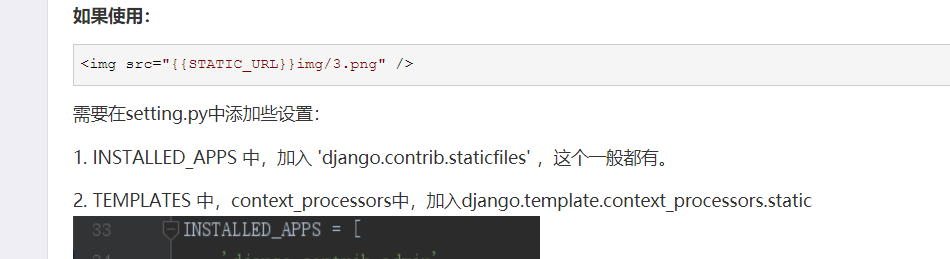

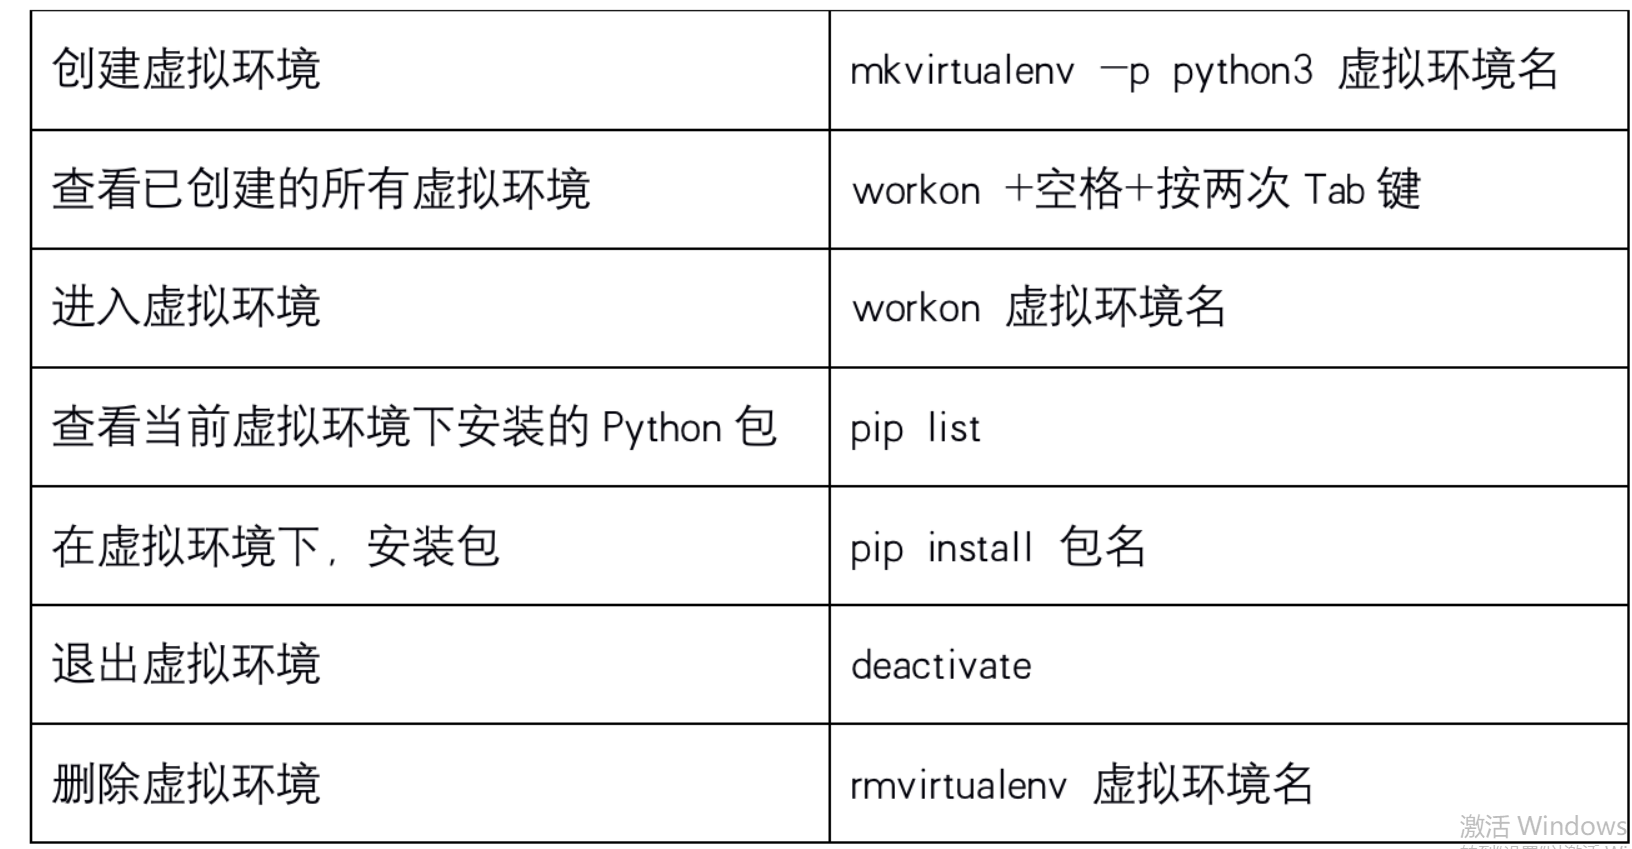

# 项目部署
- 这里用的是Ubuntu系统环境，没有使用任何云服务器，原因是因为不同的服务器环境都不一样

# 在开发机上的准备工作
- 1.确认项目没有bug-
- 2.用pip freeze > requirements.txt(如果报错就用pip list>requirements.txt)将当前环境的包导出到requirements.txt文件中，方便部署的时候安装
    - pip freeze --all > requirements导出所有的包含隐藏的基本包
    - 如果报错的是这样：WARNING: Could not generate requirement for distribution -ip 20.2.4 (d:\taotaovertualenv\env2\lib\site-packages): Parse error at "'-ip==20.'": Expected W:(abcd...),就根据它提示的位置进去把以ip文件开头的删除就可以了
- 3.把dysms_python文件准备好，因为短信验证码的这个包必须通过手动安装
- 4.将项目上传到服务器的/srv目录下，这里以git为例，使用git比其他方式（比如使用pycharm）更加安全，因为git有版本管理的功能，以后如果要回退到之前的版本，git很方便就能做到
- 5.在https://git-scm.com/downloads  下载windows版本的客户端，然后双击，一直点到下一步安装即可。
- 6.然后使用码云，在码云上创建一个项目，码云地址：https://gitee.com/
- 7.然后进入到项目中，使用以下命令做代码提交
        # 初始化一个仓库
        git init
        # 添加远程的仓库地址
        git remote add origin xxx.git
        # 在项目下新建一个.gitignore文件，该文件的意思是哪些代码不需要上传，文件里面的内容是不想上传的文件的路径，相对路径即可（相对于项目的路径，不包含项目）
        # 添加所有的代码到缓存区
        git add .  #注意所有的代码的话，后面要跟个点
        # 将代码提交到本地
        git commit -m 'firtst commit'
        # 从码云仓库中上拉数据下来（因为上传的代码会覆盖远程的代码（不过git上面是有自动保护的），所以要先把源代码拉下来，再补充进自己的代码），origin表示远程仓库的名字，master表示分支，--allow-unrelated-histories表示由于是第一次拉去，允许他们这件没有关联
        git pull origin master --allow-unrelated-histories
        # 将本地仓库中的代码提交到远程服务器的master分支上
        git push origin master
        
# 在服务器上的准备工作
- 1.ubuntu开启root用户
- 2.安装所需要的环境
    - 安装openssh方便xshell连接
        - sudo apt install openssh-server openssh-client
    - 安装vim
        - sudo apt install vim
    - 安装MySQL服务端：
        - sudo apt install mysql server mysql client
    - 安装memcached
        - 通过命令:apt install memcached
    - 修改Ubuntu的apt源（云服务器一般都有自己的源，可以不用修改，但是虚拟机没有，先拷贝/etc/apt/sources.list为/etc/apt/sources.list.bak，然后用vim编辑/etc/apt/sources.list，删除sources.list中的内容，将下面的代码粘贴到文件中，然后保存，注意不同的Ubuntu版本有不同的源，可通过lsb_release -a查看Ubuntu当前系统号，然后百度搜索对应的源）
            deb http://mirrors.aliyun.com/ubuntu/ focal main restricted universe multiverse
            deb-src http://mirrors.aliyun.com/ubuntu/ focal main restricted universe multiverse

            deb http://mirrors.aliyun.com/ubuntu/ focal-security main restricted universe multiverse
            deb-src http://mirrors.aliyun.com/ubuntu/ focal-security main restricted universe multiverse

            deb http://mirrors.aliyun.com/ubuntu/ focal-updates main restricted universe multiverse
            deb-src http://mirrors.aliyun.com/ubuntu/ focal-updates main restricted universe multiverse

            deb http://mirrors.aliyun.com/ubuntu/ focal-proposed main restricted universe multiverse
            deb-src http://mirrors.aliyun.com/ubuntu/ focal-proposed main restricted universe multiverse

            deb http://mirrors.aliyun.com/ubuntu/ focal-backports main restricted universe multiverse
            deb-src http://mirrors.aliyun.com/ubuntu/ focal-backports main restricted universe multiverse
        - 然后升级：
                sudo apt-get update
                sudo apt-get upgrade
    - 安装python3
        - sudo apt install python3
        - sudo apt install python3-pip
        - 升级pip： pip3 install --upgrade pip
    - 安装虚拟环境：
        - sudo pip install virtualenv
        - sudo pip install virtualenvwrapper
        - 安装完成后还需要配置路径，有点多，详见21Ubuntu服务器的搭建与xshell连接虚拟机
        - 常用命令：
        https://img2018.cnblogs.com/blog/1251758/201902/1251758-20190227112808389-477544532.png
    - 安装git：
        - sudo apt install git
        - 使用git下载项目代码：
                git init
                git remote add origin https://gitee.com/liu-taogege/xf-project-code.git
                git pull origin master
         
    - 进入虚拟环境中，然后进入到项目所在的目录，执行命令:pip install -r requirements.txt,安装项目依赖的包，如果提示OSError:mysql_config not found,那么再次安装sudo apt install libmysqld-dev即可，注意短信验证码的包dysms-python要单独安装，把dysme-python文件夹上传到项目中，然后进入到这个文件夹中执行命令：python setup.py install
    - 进入MySQL数据库中，创建好项目的数据库
    - 执行python3 manage.py makemigrations/migrate将模型映射到数据库中
    - 执行python3 manage.py runserver 0.0.0.0:8000，然后在自己的电脑上访问这个网站，确保没有bug
    - 在settings.py中的ALLOWED_HOST添加网站的域名或者ip地址，如果报错推荐使用ALLOWED_HOST=["*"](只是感觉不太安全）
    - 设置DEBUG=False,避免如果你的网站产生错误，而将错误信息暴露给用户，但是要注意设置好ngix
    - 在settings.py中设置好STATIC_ROOT，用来存储收集的静态文件，收集静态文件的命令如下：（关于静态文件的设置如开头所讲）
        - python3 manage.py collectstatic
    - 短信验证码的包需要在Ubuntu上特殊安装，进入dysms_python包下面，执行python3 setup.py install 
        - 具体参见：https://blog.csdn.net/LiangPeng_Python/article/details/88669128

# 安装uwsgi
- uwsgi是一个应用服务器，非静态文件的网络请求就必须通过它完成，它也可以充当静态文件的服务器，但不是它的强项，uwsgi是使用python编写的，因此通过pipe install uwsgi就可以安装，（uwsgi必须安装在系统级别的python环境中，不要安装到虚拟环境中），然后创建一个叫做uwsgi.ini的配置文件（文件位置在你放置项目的路径下即可）,文件内容如下：
        [uwsgi]
        # 必须全部为绝对路径
        # 项目的路径
        chdir = /srv/xfz_project
        # django的wsgi文件，一般是在项目同名目录下
        module = xfz.wsgi
        # python的虚拟环境的路径
        home = /usr/local/bin/virtualenvdir/xfz_env
        
        # 进程相关的设置
        # 主进程
        master = true
        # 最大数量的工作进程
        processes = 10
        http = :8000
        
        # 设置socket的权限
        chmod-socket = 666
        # 退出的时候是否清理环境
        vacuum = true
        daemonize = /var/log/xfz_uwsgi.log
- 然后通过命令uwsgi --ini uwsgi.ini运行，确保没有错误，然后浏览器访问http://ip地址:8000 ，如果能够访问，（可能没有静态文件），说明配置没有问题
- 但是显然会报错，HTTP返回500的状态码，这是因为在apps下的ueditor的views函数中有这样：os.chdir(os.path.dirname(__file__))，把它注释掉即可
- 查看uwsgi进程： ps aux|grep uwsgi
- 杀死多个uwsgi进程：kill -9 最开始的那个进程号

# 安装和配置nginx
- 虽然uwsgi可以正常的部署我们的项目，但是依然要采用nginx来作为web服务器，使用nginx来作为web服务器有以下优点：
    - 1.uwsgi对静态文件资源处理并不好，包括响应速度，缓存等
    - 2.nginx作为专业的web服务器，暴露在公网上会比uwsgi更加安全一点
    - 3.运维起来更加方便，比如要将某些ip写入黑名单，nginx可以非常方便的写进去，而uwsgi要写一段代码才能实现
- 安装
    - 通过apt install nginx即可安装
### nginx简单操作命令
- 启动：service nginx start（systemctl start nginx）
- 关闭：service nginx stop
- 重启：service nginx restart
- 测试配置文件：service nginx configtest
- 查看端口使用情况：netstat -apn|grep :80,一旦80端口被占用，service nginx start就会失败

### 添加配置文件
- 在/etc/nginx/conf.d目录下，新建一个文件，叫做xfz.conf,然后将以下代码粘贴进去：配置完成以后，先杀死所有的uwsgi进程，然后重新启动uwsgi进程：uwsgi --ini uwsgi.ini
        upstream xfz {
        server unix:///srv/xfz_project/xfz.sock;
        }
        
        # 配置服务器
        server {
                # 监听的端口号
                listen 80;
                # 域名
                server_name 192.168.2.36;
                charset utf-8;

                # 最大的文件上传尺寸
                client_max_body_size 75M;

                # 静态文件访问的url，这个static指的是你在settings中设置的STATIC_URL的值，我设置的是mystatic,但建议还是用static
                location /mystatic {
                        # 静态文件地址
                        alias /srv/xfz_project/static_dist;
                }

                # 最后，发送所有非静态文件请求到django服务器
                location / {
                        uwsgi_pass xfz;
                        # uwsgi_params文件地址
                        include /etc/nginx/uwsgi_params;
                }
        }
- 然后重启service nginx restart


# 使用supervisor管理uwsgi进程
- 让supervisor管理uwsgi，可以在uwsgi在发生意外的情况下，会自动重启
### 安装supervisor
- 因为supervisor是用python写的，所以通过pip即可安装，pip3 install sueprvisor
### 启动
- 在项目的根目录下创建一个文件叫做：supervisor.conf,然后将以下代码输入到配置文件中：
        # supervisor的程序名字
        [pogram:xfz]
        # supervisor执行的命令(这就相当于前面执行的那个ini文件)
        command=uwsgi --ini uwsgi.ini
        # 项目的目录
        directory = /srv/xfz_project
        # 开始的时候等待多少秒
        startsecs=0
        # 停止的时候等待多少秒
        stopwaitsecs=0
        # 自动开始
        autostart=true
        # 程序挂了后自动重启
        autorestart=true
        # 输出的log文件
        stdout_logfile=/var/log/xfz_supervisord.log
        # 输出的错误文件
        stderr_logfile=/var/log/xfz_supervisord.err

        [supervisord]
        # log的级别
        loglevel=debug

        [inet_http_server]
        # supervisor的服务器
        port = :9001
        # 用户名和密码
        username = admin
        password = 123

        # 使用supervisorctl的配置
        [supervisorctl]
        # 使用supervisorctl登录的地址和端口号
        serverurl = http://127.0.0.1:9001

        # 登录supervisor的用户名和密码
        username = admin
        password = 123

        [rpcinterface:supervisor]
        supervisor.rpcinterface_factory = supervisor.rpcinterface:make_main_rpcinterface
- 然后使用命令supervisorctl -c supervisor.conf就可以了。以后如果想要启动uwsgi，就可以通过命令supervisorctl -c supervisor.conf进入到管理控制台，然后就可以执行相关的命令进行管理：
    - status：查看状态
    - start program_name:启动程序
    - restart program_name:重新启动程序
    - stop program_name:关闭程序
    - reload: 重新加载配置文件
    - quit: 退出控制台

# Git的使用
- 整体流程：工作区add到缓存区再commit到仓库，一旦对文件进行修改或删除，则要逐级进行修改或删除
- 初始化仓库： git init
- git add :向暂存区添加内容
- git commit -m "message for desc":向仓库提交内容，一般注释信息是要求强制添加
- git status:显示当前状态，若有文件修改，则会有相应的提示
    - 若想查看文件修改的具体情况：git diff 文件名
- git config --system --unset credential.helper:清除本地保存的用户名和密码
- git config credential.helper store：保存用户名和密码到本地
- git rm 文件：删除
- git log：查看日志,可以查出哪个人对仓库做了什么操作，相当于历史记录，然后用reset可以回到这个历史
    - 若日志太多，可以用 git log --pretty=oneline 语句进行精简
    - 若从新版本回到旧版本后有后悔了，则可以使用 git reflog, 得到你每一次的命令，然后根据版本后又可以回到未来的版本
- git reset --hard 版本号:回到之前的状态
- git checkout -- 文件：意思就是文件在工作区的修改全部撤销，这里有两种情况：
    - 一种是文件自修改后还没有被放到暂存区，现在，撤销修改就回到和版本库一模一样的状态；
    - 一种是文件已经添加到暂存区后，又作了修改，现在，撤销修改就回到添加到暂存区后的状态。

- github and Bitbuckets
    - 如何上传文件到GitHub：
            git init
            git add REANME.md
            git commit -m "first.commit"
            git remote add origin https:你的GitHub网址
            git push -u origin master
- bitbukets:私有的，创建方法类似
    - 克隆仓库到本地：git clone httPs:你的bitbukets网址